# Regression Exercises

## Linear

In [ ]:
# Loading data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Read data from Github
data_url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/ex1data2.txt"
data_array = np.genfromtxt(data_url, delimiter=',')

# The columns in this data set are define as folows:
"""
    0 = floor area
    1 = number of bedrooms
    2 = sale price
"""
    
# Store the relevant columns in more descriptive variables
x_sqft = data_array[:,0]
y_value = data_array[:,2]
print(x_sqft)

[2104. 1600. 2400. 1416. 3000. 1985. 1534. 1427. 1380. 1494. 1940. 2000.
 1890. 4478. 1268. 2300. 1320. 1236. 2609. 3031. 1767. 1888. 1604. 1962.
 3890. 1100. 1458. 2526. 2200. 2637. 1839. 1000. 2040. 3137. 1811. 1437.
 1239. 2132. 4215. 2162. 1664. 2238. 2567. 1200.  852. 1852. 1203.]


Here we'll build off of the tutorial exercise, first finding the best linear fit for floor area (sqft) vs valued price (USD). Recall that setting the derivative = 0 and solving for 𝑏 & 𝑚 produces formula for the best fit trend:
$$ m = \frac{\sum^n_{i=1} (x_i-x_{mean})(y_i-y_{mean})}{\sum^n_{i=1} (x_i-x_{mean})^2} $$
$$ b = y_{mean}-m*x_{mean} $$

In [ ]:
def find_best_fit(xx,yy):
    '''
      This function finds the best linear fit for yy vs xx
    '''
    x_mean = xx.mean()
    y_mean = yy.mean()
    
    m = 0
    b = 0

    for y in yy:
      for x in xx:
        m = ((x-x_mean)*(y-y_mean))/((x-x_mean)**2)
    
    b = y_mean-m*x_mean
    print(m, b)
    
    
    return m, b


find_best_fit(x_sqft, y_value)

126.50756181483557 87311.40313675281


(126.50756181483557, 87311.40313675281)

In [ ]:
def find_best_fit(xx,yy):
    '''
      This function finds the best linear fit for yy vs xx
    '''
    x_mean = xx.mean()
    y_mean = yy.mean()
    
    denominator = 0
    numerator = 0
    m = 0
    b = 0
    
    for a in range(len(xx)):
        numerator = numerator + ((xx[a]-x_mean)*(yy[a]-y_mean))
    
    for x in xx:
        denominator = denominator + (x-x_mean)**2

        
    m = numerator/denominator
    
    # for y in yy:
    #   for x in xx:
    #     m = numerator/denominator
    
    b = y_mean-m*x_mean
    
    print(m, b)
    
    return m, b


find_best_fit(x_sqft, y_value)

134.52528772024135 71270.49244872906


(134.52528772024135, 71270.49244872906)

In [ ]:
# Use your function to show the best fit values for our data
(mm, bb) = find_best_fit(x_sqft, y_value)
fit_str = 'y = {aa:.1f}x + {bb:.1f}'
print(fit_str.format(aa=mm,bb=bb))

134.52528772024135 71270.49244872906
y = 134.5x + 71270.5


Now we have the best fit trend line that minimizes total error for our data, let's try plotting it and see what it looks like. Since its just an equation, we need to *sample* the curve in order to plot it. To do this, we'll find the difference between the largest and smallest floor area, and divide it into 100 sample points.

[ 852.          888.62626263  925.25252525  961.87878788  998.50505051
 1035.13131313 1071.75757576 1108.38383838 1145.01010101 1181.63636364
 1218.26262626 1254.88888889 1291.51515152 1328.14141414 1364.76767677
 1401.39393939 1438.02020202 1474.64646465 1511.27272727 1547.8989899
 1584.52525253 1621.15151515 1657.77777778 1694.4040404  1731.03030303
 1767.65656566 1804.28282828 1840.90909091 1877.53535354 1914.16161616
 1950.78787879 1987.41414141 2024.04040404 2060.66666667 2097.29292929
 2133.91919192 2170.54545455 2207.17171717 2243.7979798  2280.42424242
 2317.05050505 2353.67676768 2390.3030303  2426.92929293 2463.55555556
 2500.18181818 2536.80808081 2573.43434343 2610.06060606 2646.68686869
 2683.31313131 2719.93939394 2756.56565657 2793.19191919 2829.81818182
 2866.44444444 2903.07070707 2939.6969697  2976.32323232 3012.94949495
 3049.57575758 3086.2020202  3122.82828283 3159.45454545 3196.08080808
 3232.70707071 3269.33333333 3305.95959596 3342.58585859 3379.21212121
 3415.8

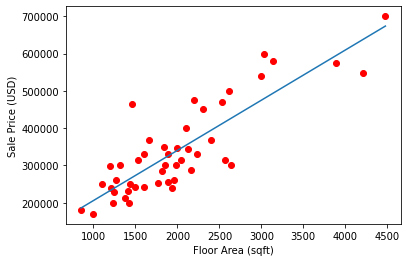

In [ ]:
# Plot the data

plt.plot(x_sqft, y_value, 'ro'); plt.xlabel("Floor Area (sqft)"); plt.ylabel("Sale Price (USD)");

# Sample the range from minimum to maximum sqft to get 100 points

def calculate_y(x_sqft):
   return int(134.5*x_sqft + 71270.5)


list_sqft = list(x_sqft)
list_sqft.sort()

maximum = max(list_sqft)
minimum = min(list_sqft)

sample = np.linspace(minimum, maximum, num = 100)
print(sample)

# Apply the best fit equation to each sample point and plot the result
points_y = []

for item in sample:
   points_y.append(calculate_y(item))

#print(points_y)

plt.plot(sample,points_y)
index = list(x_sqft).index(1600)
print(index)
print(y_value[1])



1: Given these parameters, how much should a house with 1600 sqft cost?

$286,470

2: From the dataset, how much did a house with 1600 sqft actually cost?
$329,900


3: Assuming the current 1600 sqft house would sell for as much as the historical one, how much money would we have lost? What percentage of the total price is this?

$36,430 lost. That is 11.04% of the actual cost.

Now compare the values for 𝑚 and 𝑏 that sklearn generated in the tutorial notebook with the values that you found just now with your function. Hopefully they match.

In [ ]:
print("Sklearn:",134.52528772, 71270.492448729)
print("My function:",mm,bb)

Sklearn: 134.52528772 71270.492448729
My function: 134.52528772024135 71270.49244872906


---
Remember how despite adding an entire new variable, the $R^2$ value barely increased? Let's investigate this further by finding the correlation ($R^2$) value for a regression of square footage vs. number of bedrooms.

In [ ]:
import sklearn.linear_model as lm

x_sqft_shaped = x_sqft.reshape(-1,1)

# Get the number of bedrooms
x_rooms = data_array[:,1]

# Reshape the data to the required format for lm's fit function
x_rooms_shaped = x_rooms.reshape(-1,1)

# Create a new linear regression model
model = lm.LinearRegression()

# Run fit for two independent variables
housepredictor = model.fit(x_sqft_shaped,x_rooms_shaped)
print(housepredictor.score(x_sqft_shaped,x_rooms_shaped))


0.3135632699338188


Do 2 variables have to be very correlated to reduce their effectiveness together?

Even though the variables are loosely correlated, they are still effective together.

## Logistic

We are going to predict wheter or not someone has breast cancer using Logistic Regression on sklearn's breast cancer dataset. It is up to you to decide what features to get the best results.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data = load_breast_cancer()
print(data.target[:])
diagnosis = list(data.target[:])
print(diagnosis)
#df = pd.DataFrame(data.data)
print(data.target_names)

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Diagnosis'] = diagnosis
print(df.head(10))
print(df.shape)

#print(df.head())
#print(df.describe())
print(type(data.feature_names))
X_cols = list(df.columns)
Y_cols = 'Diagnosis'
print(X_cols)
test_size = 0.15
X_train, X_val, y_train, y_val = train_test_split(df[X_cols], df[Y_cols], test_size=test_size, random_state = 3)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

LogisticRegression()

Test your logistical regression! You must get an accuracy of > 80%

In [ ]:
from sklearn.metrics import accuracy_score

# YOUR CODE HERE
y_train_pred=logreg.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=logreg.predict(X_val)

print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  99.58592132505176
Validation Accuracy is  95.34883720930233


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ae221d39-921e-4e1a-a30c-d47650081509' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>